In [18]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

import tweepy
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time

In [19]:
from config import (consumer_key, 
                    consumer_secret, 
                    access_token, 
                    access_token_secret)


In [20]:
# Setup Tweepy API Authentication# Setup T 
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

In [21]:
# Target Search Term
news_outlet = ["@BBCNEWS", "@CBSnews", "@CNN", "@Foxnews", "@nytimes"]
counter = 1
sentiments =[]

In [22]:
for outlet in news_outlet:
    public_tweets = api.user_timeline(outlet, count=100)
    tweetnumber = 1       
    for tweet in public_tweets:
        print("Tweet %s: %s" % (counter, tweet["text"]))
        compound = analyzer.polarity_scores(tweet["text"])["compound"]
        pos = analyzer.polarity_scores(tweet["text"])["pos"]
        neu = analyzer.polarity_scores(tweet["text"])["neu"]
        neg = analyzer.polarity_scores(tweet["text"])["neg"]
        tweets_ago = tweetnumber
        sentiments.append({"Media Source": outlet,
                           "Text":tweet["text"],
                           "Date": tweet["created_at"],
                           "Compound": compound,
                           "Positive": pos,
                           "Neutral": neu,
                           "Negative": neg,
                           "Tweet Count": tweetnumber})
        tweetnumber +=1
        counter +=1

Tweet 1: RT @BBCWorld: Mon dieu! 🤦‍♀️

#BastilleDay went off with a bang - for these police motorcyclists

https://t.co/jh88YrDQA4 #14juillet https:…
Tweet 2: Autistic boy's mum praises 'lovely' school prom classmates https://t.co/KkrBN5beHd
Tweet 3: Is Russia the real winner of World Cup 2018? https://t.co/Gzn3gkKL1r
Tweet 4: Wimbledon 2018: Angeligue Kerber beats Serena Williams to win title https://t.co/AiqRmK0qjJ
Tweet 5: RT @5liveSport: History for Angelique Kerber! 👏

The German beats Serena Williams 6-3, 6-3 to win her first ever #Wimbledon singles title!…
Tweet 6: Reality Check: is London's murder rate still higher than New York's? https://t.co/EDqS4bkt1m
Tweet 7: British teenager dies in Magaluf balcony fall https://t.co/YeZ1wD1jWr
Tweet 8: Dog poo in Clevedon's Marine Lake causes ear infections https://t.co/UlMulVTx3y
Tweet 9: World Cup 2018: England finish fourth after Belgium defeat https://t.co/cjulTH4qCh
Tweet 10: RT @BBCSport: FT Belgium 2-0 England

England leave Russia

Tweet 94: Turnberry braced for Trump arrival https://t.co/MmZR5ErfLO
Tweet 95: Heatwave threatens to cause shortage of peas https://t.co/lGdl4oS2D4
Tweet 96: Leeds school uses spoons to help prevent forced marriage

https://t.co/UKQdtjEVtm https://t.co/5l6HYCkirz
Tweet 97: Isner loves a marathon match 🎾

#wimbledon coverage continues on @BBCOne https://t.co/YhpZHZqAq3
Tweet 98: Donald Trump: US-UK relationship is 'highest level of special'

https://t.co/F78B9tSdKS #TrumpVisitUK https://t.co/D13RfEJoOj
Tweet 99: ⚡️ “"The highest level of special" relationship”

https://t.co/X6eHunLySI
Tweet 100: RT @bbcweather: With the weather hotting up this weekend, Sunday could see the hottest Men's Final in over 20 years at #Wimbledon #TheChamp…
Tweet 101: The "Trump Baby" balloon was transported overnight from London to Edinburgh, Scotland, where thousands are protesti… https://t.co/S7CCcyDCuw
Tweet 102: From Eisenhower to Trump, take a look at Queen Elizabeth's most memorable moments with U.S. pr

Tweet 182: RT @CBSEveningNews: Twelve Russian intelligence officers, indicted by the DOJ on Friday, allegedly "spearphished individuals affiliated wit…
Tweet 183: RT @CBSEveningNews: This New York firefighter was the first fire chief to enter one of the twin towers on 9/11. This week, Joe Pfeifer beco…
Tweet 184: The U.S. is on track to top Russia as the world's biggest oil producer https://t.co/H3k7AK3oFB https://t.co/7PxjpezaKy
Tweet 185: Failed gas stations run by Vice President Pence's family burned up $20 million in taxpayer dollars… https://t.co/ftwXTplskq
Tweet 186: Walmart has patented audio surveillance technology that can record conversations from customers and employees… https://t.co/mPbY0jSHpP
Tweet 187: A child who may be American but was still separated from his mom near the Mexican border has been in federal custod… https://t.co/3XN6qN3uLZ
Tweet 188: Russia isn't too happy about the U.S. indicting 12 of its military officers for the Democratic National Committee h… https

Tweet 301: .@kevincorke: "A bit of breaking news - Fox News can confirm that @POTUS and President Vladimir Putin will conduct… https://t.co/bElJ5ZYF8Y
Tweet 302: TONIGHT: Don’t miss “Fox Report with Jon Scott” at 7p ET on Fox News Channel! @JonScottFNC https://t.co/cv5d2FWMxo
Tweet 303: Minnesota authorities investigating after teen fatally shot by deputies https://t.co/X3ti1h2Igh
Tweet 304: .@RepAndyBiggsAZ: "Here's a guy with literally hundreds - maybe thousands - of text messages showing bias, and he's… https://t.co/FOAFhPkPIP
Tweet 305: Ed Rollins on Trump/Putin summit: "This is going to be a test of wills." https://t.co/1yypK7TIPS
Tweet 306: .@HeatherZuma: "@POTUS's tax cuts are really fueling this economy." https://t.co/Xh2Tn9TslR
Tweet 307: In an interview on @foxandfriends, Democratic Congressman @RepTimRyan discussed his economic philosophy.… https://t.co/ThHI2JQ2uO
Tweet 308: 'Super Judgmental': @RepTimRyan Reacts to @NancyPelosi's Remark That He Is 'Inconsequential' https://

Tweet 401: When the 2 leaders sit down in Finland, Trump’s abiding desire to win over Vladimir Putin will loom as a powerful d… https://t.co/9xMAYVnWoS
Tweet 402: Leading up to his weekend in Scotland, Trump has managed to repeatedly plug his Turnberry golf resort, alarming eth… https://t.co/ftr0hvb6cl
Tweet 403: "We’re trying to tell as many black stories as possible and resist one-dimensional representations" https://t.co/BWHaZFySHp
Tweet 404: We chart America’s complicated history of infant feeding, starting with the spread of formula https://t.co/Z3W4t123ij
Tweet 405: For Isabella and thousands of other migrant parents hoping to be reunited with their children, part of the trauma h… https://t.co/bfQKyEd241
Tweet 406: Many Democrats are outmatched by Republicans when it comes to tech-savvy campaigning. A network of 4,500 tech worke… https://t.co/IvMOv5Wp08
Tweet 407: RT @nytopinion: After World War II, many Germans saw America as the guarantor of the liberal democratic order. It’s a

In [23]:

sentiments_df=pd.DataFrame.from_dict(sentiments)#check
# sentiments_df["User"].describe()

In [24]:
sentiments_csv= sentiments_df[['Media Source','Date','Text','Compound','Positive','Neutral','Negative','Tweet Count']]#restuctur
sentiments_csv.head()#check

,Media Source,Date,Text,Compound,Positive,Neutral,Negative,Tweet Count
0,@BBCNEWS,Sat Jul 14 17:16:59 +0000 2018,RT @BBCWorld: Mon dieu! 🤦‍♀️\n\n#BastilleDay w...,0.0000,0.000,1.000,0.0,1
1,@BBCNEWS,Sat Jul 14 17:06:23 +0000 2018,Autistic boy's mum praises 'lovely' school pro...,0.5267,0.298,0.702,0.0,2
2,@BBCNEWS,Sat Jul 14 16:48:37 +0000 2018,Is Russia the real winner of World Cup 2018? h...,0.5859,0.297,0.703,0.0,3
3,@BBCNEWS,Sat Jul 14 16:33:56 +0000 2018,Wimbledon 2018: Angeligue Kerber beats Serena ...,0.5859,0.275,0.725,0.0,4
4,@BBCNEWS,Sat Jul 14 16:22:54 +0000 2018,RT @5liveSport: History for Angelique Kerber! ...,0.6580,0.166,0.834,0.0,5


In [25]:
sentiments_csv['Media Source'] = sentiments_csv['Media Source'].map(lambda x: x.lstrip('@'))
sentiments_csv.head()#check

,Media Source,Date,Text,Compound,Positive,Neutral,Negative,Tweet Count
0,BBCNEWS,Sat Jul 14 17:16:59 +0000 2018,RT @BBCWorld: Mon dieu! 🤦‍♀️\n\n#BastilleDay w...,0.0000,0.000,1.000,0.0,1
1,BBCNEWS,Sat Jul 14 17:06:23 +0000 2018,Autistic boy's mum praises 'lovely' school pro...,0.5267,0.298,0.702,0.0,2
2,BBCNEWS,Sat Jul 14 16:48:37 +0000 2018,Is Russia the real winner of World Cup 2018? h...,0.5859,0.297,0.703,0.0,3
3,BBCNEWS,Sat Jul 14 16:33:56 +0000 2018,Wimbledon 2018: Angeligue Kerber beats Serena ...,0.5859,0.275,0.725,0.0,4
4,BBCNEWS,Sat Jul 14 16:22:54 +0000 2018,RT @5liveSport: History for Angelique Kerber! ...,0.6580,0.166,0.834,0.0,5


In [26]:
sentiments_csv.to_csv("News Mood Tweets.csv")

In [27]:
# colors
news_colors={"BBC": "lightblue",
             "CBS":"green", 
             "CNN":"red",
             "Fox":"blue",
             "nytimes": "yellow"}

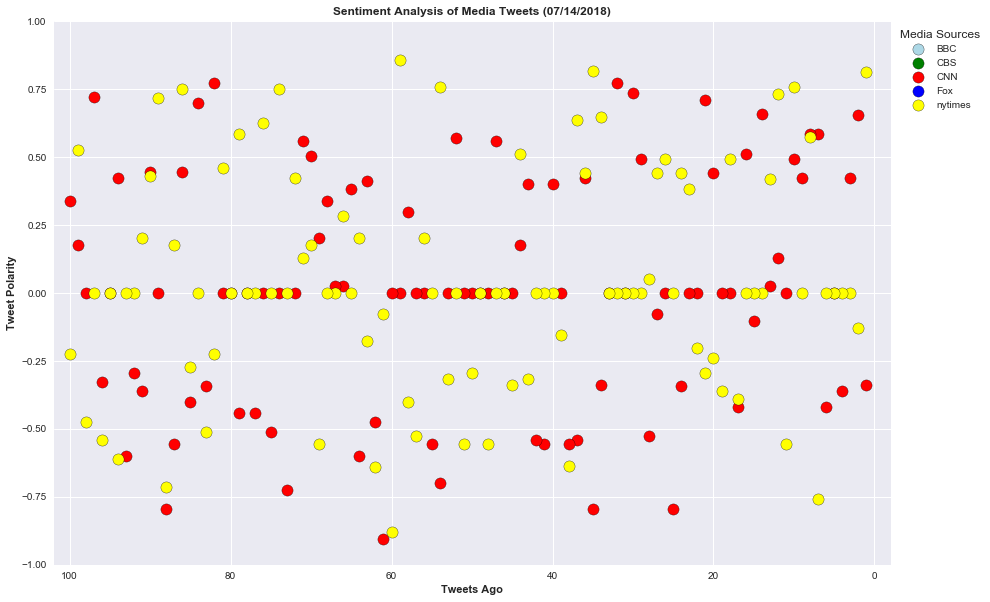

In [28]:
#First Plot
sns.set()
plt.figure(figsize = (15,10))
plt.xlabel("Tweets Ago",fontweight='bold')
plt.ylabel("Tweet Polarity",fontweight='bold')
plt.title("Sentiment Analysis of Media Tweets (%s)" % (time.strftime("%m/%d/%Y")),fontweight='bold')
plt.xlim(102,-2, -1)
plt.ylim(-1,1)
for newsoutlet in news_colors.keys():
    df = sentiments_csv[sentiments_csv['Media Source'] == newsoutlet]
    sentiment_analysis = plt.scatter(df["Tweet Count"],df["Compound"], label = newsoutlet, color = news_colors[newsoutlet], edgecolor = "black", s=125)
plt.legend(bbox_to_anchor = (1,1), title = 'Media Sources')    
plt.show()
sentiment_analysis.figure.savefig('SentimentAnalysis.png')

In [29]:
scoresbyoutlet=sentiments_csv.groupby("Media Source")["Compound"].mean()
scoresbyoutlet#check

Media Source
BBCNEWS    0.020621
CBSnews   -0.138616
CNN        0.011766
Foxnews    0.023118
nytimes    0.039461
Name: Compound, dtype: float64

In [30]:
sentiments_csv.head()#check


,Media Source,Date,Text,Compound,Positive,Neutral,Negative,Tweet Count
0,BBCNEWS,Sat Jul 14 17:16:59 +0000 2018,RT @BBCWorld: Mon dieu! 🤦‍♀️\n\n#BastilleDay w...,0.0000,0.000,1.000,0.0,1
1,BBCNEWS,Sat Jul 14 17:06:23 +0000 2018,Autistic boy's mum praises 'lovely' school pro...,0.5267,0.298,0.702,0.0,2
2,BBCNEWS,Sat Jul 14 16:48:37 +0000 2018,Is Russia the real winner of World Cup 2018? h...,0.5859,0.297,0.703,0.0,3
3,BBCNEWS,Sat Jul 14 16:33:56 +0000 2018,Wimbledon 2018: Angeligue Kerber beats Serena ...,0.5859,0.275,0.725,0.0,4
4,BBCNEWS,Sat Jul 14 16:22:54 +0000 2018,RT @5liveSport: History for Angelique Kerber! ...,0.6580,0.166,0.834,0.0,5


In [31]:
x_axis=np.arange(len(scoresbyoutlet))
# x_axis.head()

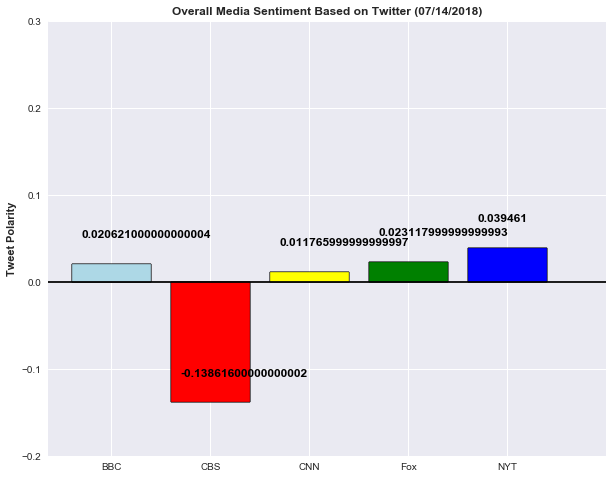

<Figure size 432x288 with 0 Axes>

In [32]:
# Create bar chart
sns.set()

plt.figure(figsize = (10,8))
for newsoutlet in news_colors.keys():
    df = sentiments_csv[sentiments_csv['Media Source'] == newsoutlet]
#     print (news_colors[newsoutlet])
   
    overall_media_sentiment = plt.bar(x_axis,scoresbyoutlet, color = {"lightblue","green", "yellow", "red", "blue"}, label = newsoutlet, edgecolor = "black")
    
# plt.bar(x_axis,scoresbyoutlet, label = newsoutlet, color = news_colors[newsoutlet], edgecolor = "black")
plt.ylim(-.2, .3)
plt.ylabel("Tweet Polarity",fontweight='bold')
plt.axhline(y=0, color = 'black') #adds a horizontal line at zero
for i, v in enumerate(scoresbyoutlet):
    plt.text(i-.3, v+.03, str(v).format(), color='black', fontweight='bold')
plt.title("Overall Media Sentiment Based on Twitter (%s)" % (time.strftime("%m/%d/%Y")),fontweight='bold')
x_labels = ["BBC", "CBS", "CNN", "Fox", "NYT"]
x_locations = [value for value in np.arange(6)]#tick locations
plt.xticks(x_locations, x_labels)
plt.show()
plt.savefig('Overall Media Sentiment Based on Twitter.png')

3 Observations:

Employing Sentiment Analysis CBS was the only news source that had a negative sentiment for the date of july 14th, 2017

Employing Sentiment Analysis NYT was the most positive out of the group

Employng Sentiment Analysis the CNN was closest to Neutral in their sentiment